In [ ]:
# импорт датасета с kaggle
import kagglehub
ravirajsinh45_real_life_industrial_dataset_of_casting_product_path = kagglehub.dataset_download('ravirajsinh45/real-life-industrial-dataset-of-casting-product')
downloaded_dir = ravirajsinh45_real_life_industrial_dataset_of_casting_product_path
print('Data source import complete.')


Data source import complete.


In [8]:
import os

# Путь к датасету

# Проверяем вложенные папки
inner_casting_data = os.path.join(downloaded_dir, 'casting_data/casting_data')
inner_casting_512 = os.path.join(downloaded_dir, 'casting_512x512/casting_512x512')

print(os.listdir(inner_casting_data))  # Должно показать ['def_front', 'ok_front']
print(os.listdir(inner_casting_512))  

['test', 'train']
['def_front', 'ok_front']


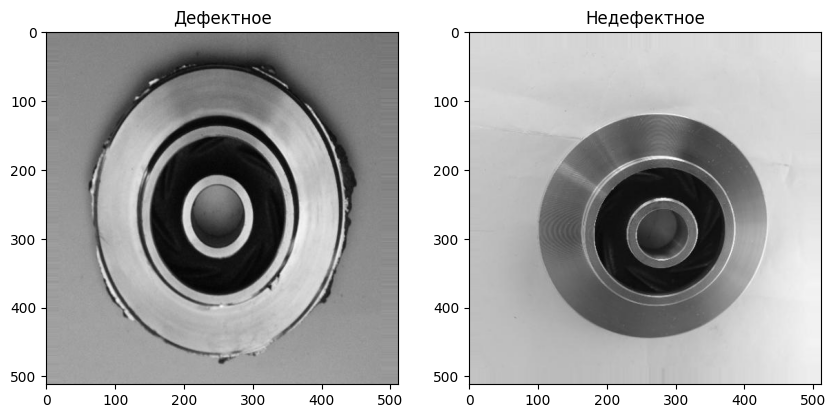

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Пути к подпапкам

defect_dir = os.path.join(downloaded_dir, 'casting_512x512/casting_512x512/def_front')
ok_dir = os.path.join(downloaded_dir, 'casting_512x512/casting_512x512/ok_front')

# Загрузка примеров изображений
defect_img = Image.open(os.path.join(defect_dir, os.listdir(defect_dir)[0]))
ok_img = Image.open(os.path.join(ok_dir, os.listdir(ok_dir)[0]))

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Дефектное")
plt.imshow(defect_img)
plt.subplot(1, 2, 2)
plt.title("Недефектное")
plt.imshow(ok_img)
plt.show()

<h2 style="text-align:center;font-size:200%;">
    <b>Объяснение модели для классификации брака на производстве</b>
</h2>
<h3  style="text-align:center;">Ключевые слова :
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Классификация фото</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">аугментация данных</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">CNN</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Объяснение модели</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Аналитика ошибок</span>
</h3>

<hr>

<a id='top'></a>
<h2 style="font-size:150%;"><span id='top'>Оглавление</span></h2>
<blockquote>
    <ol>
        <li><a href="#Overview">Обзор</a></li>
        <ul>
            <li><a href="#Project-Detail">Проект деталей</a></li>
            <li><a href="#About-Dataset">О датасете</a></li>
        </ul>
        <li><a href="#Import-libraries">импорт библиотек(используем tensorflow)</a></li>
        <li><a href="#Load-the-dataset">загрузка датасета</a></li>
        <li><a href="#Pre-Processing">препроцессинг</a></li>
        <ul>
            <li><a href="#What-is-Data-Augmentation?">Что такое аугментация</a></li>
            <li><a href="#Execute-Data-Augmentation">Извлекаем данные для аугментации</a></li>
        </ul>
        <li><a href="#Modeling">Создание модели</a></li>
        <ul>
            <li><a href="#Model-Settings">Настройки модели</a></li>
            <li><a href="#Build-Model">Построение модели</a></li>
            <li><a href="#Model-Performance">Показания метрик для данной модели</a></li>
            <li><a href="#Predict-on-Some-Images">Предсказание случайной фотографии</a></li>
            <li><a href="#Misclassified-Images">Неудачное предсказывание</a></li>
            <li><a href="#Explain-Model">Объяснение модели</a></li>
            <li><a href="#Explain-Why-Misclassified">Почему модель даёт неверное предсказание</a></li>
        </ul>
        <li><a href="#Conclusion">Выводы</a></li>
        <li><a href="#References">Источники</a></li>
    </ol>
</blockquote>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Обзор</div>
## Детали проекта  
В производственной отрасли снижение ошибок обработки в производственном процессе важно для максимизации прибыли. Чтобы уменьшить ошибки обработки, необходимо выделять бюджет на контроль качества, внедрять ручную проверку и анализировать производственный процесс. В частности, процесс проверки проводится многими компаниями, но существуют <u>проблемы, такие как неравномерная точность в зависимости от проверяющих сотрудников и увеличение затрат на рабочую силу</u>.<br>
В этой работе мы проверим, можно ли устранить узкое место <b>"ручной проверки"</b>, <u>автоматизировав процесс контроля с помощью машинного обучения</u> в производстве [литых изделий](https://en.wikipedia.org/wiki/Casting_%28metalworking%29). [Литьё](https://en.wikipedia.org/wiki/Casting) — это технология, при которой расплавленный металл заливается в форму и обрабатывается до нужной формы.  
Согласно [этой статье](https://en.wikipedia.org/wiki/Casting_defect), вот некоторые из дефектов в процессе литья:
* воздушные раковины
* поры
* заусенцы
* усадочные дефекты
* дефекты материала формы
* дефекты заливки металла
* металлургические дефекты

## О наборе данных
<!-- [Этот набор данных](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product) содержит изображения рабочих колёс для погружных насосов.<br/><br/>
<table border="0">
     <tr style="background-color: white !important;">
        <td>
            <img src="https://static.turbosquid.com/Preview/2020/06/07__08_34_27/11R131.JPGB3B4468C-B515-4E11-92F7-4CA67966DB2BZoom.jpg" width="300">
            <figcaption style="text-align:center">Погружной насос</figcaption>
        </td>
        <td>
            <img src="https://5.imimg.com/data5/WI/KC/MY-6121640/submersible-pump-impeller-500x500.jpg" width="300">
            <figcaption style="text-align:center">Рабочее колесо</figcaption>
        </td>
    </tr>
 </table><br/> -->
Изображения заранее размечены как <b>ok (нормальные)</b> и <b>def (дефектные/аномальные)</b>. Кроме того, поскольку при съёмке важно обеспечить стабильное освещение, данные были получены с использованием специальной системы освещения.

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Импорт библиотек</div>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
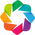

In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import json

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report

import shap
from operator import itemgetter

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Загрузка датасета</div>

In [11]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [12]:
defect_dir
ok_dir
downloaded_dir

'C:\\Users\\User\\.cache\\kagglehub\\datasets\\ravirajsinh45\\real-life-industrial-dataset-of-casting-product\\versions\\2'

In [13]:
# Пути к подпапкам
# inner_casting_data = os.path.join(downloaded_dir, 'casting_data/casting_data')
# inner_casting_512 = os.path.join(downloaded_dir, 'casting_512x512/casting_512x512')
# defect_dir = os.path.join(downloaded_dir, 'casting_512x512/casting_512x512/def_front')
# ok_dir = os.path.join(downloaded_dir, 'casting_512x512/casting_512x512/ok_front')
print(os.listdir(inner_casting_data+'/test/ok_front'))  # Должно показать ['def_front', 'ok_front']
print(os.listdir(inner_casting_512))  # Аналогично
print(downloaded_dir)
print(inner_casting_data)

['cast_ok_0_10.jpeg', 'cast_ok_0_1001.jpeg', 'cast_ok_0_1002.jpeg', 'cast_ok_0_1003.jpeg', 'cast_ok_0_1019.jpeg', 'cast_ok_0_1020.jpeg', 'cast_ok_0_1021.jpeg', 'cast_ok_0_1022.jpeg', 'cast_ok_0_1026.jpeg', 'cast_ok_0_1028.jpeg', 'cast_ok_0_1031.jpeg', 'cast_ok_0_1040.jpeg', 'cast_ok_0_1066.jpeg', 'cast_ok_0_1069.jpeg', 'cast_ok_0_1077.jpeg', 'cast_ok_0_1088.jpeg', 'cast_ok_0_1092.jpeg', 'cast_ok_0_1093.jpeg', 'cast_ok_0_1095.jpeg', 'cast_ok_0_1096.jpeg', 'cast_ok_0_1120.jpeg', 'cast_ok_0_1121.jpeg', 'cast_ok_0_1127.jpeg', 'cast_ok_0_1132.jpeg', 'cast_ok_0_1134.jpeg', 'cast_ok_0_1137.jpeg', 'cast_ok_0_1140.jpeg', 'cast_ok_0_1141.jpeg', 'cast_ok_0_1144.jpeg', 'cast_ok_0_1145.jpeg', 'cast_ok_0_1160.jpeg', 'cast_ok_0_1165.jpeg', 'cast_ok_0_1169.jpeg', 'cast_ok_0_1170.jpeg', 'cast_ok_0_1171.jpeg', 'cast_ok_0_1172.jpeg', 'cast_ok_0_1173.jpeg', 'cast_ok_0_1174.jpeg', 'cast_ok_0_1176.jpeg', 'cast_ok_0_1180.jpeg', 'cast_ok_0_1200.jpeg', 'cast_ok_0_1202.jpeg', 'cast_ok_0_1203.jpeg', 'cast_ok_0_1

In [14]:
data_dir = "/kaggle/input"

In [15]:
#my_data_dir = f'{data_dir}/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/'
my_data_dir = inner_casting_data
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'
print(train_path)
print(os.listdir(inner_casting_data))

C:\Users\User\.cache\kagglehub\datasets\ravirajsinh45\real-life-industrial-dataset-of-casting-product\versions\2\casting_data/casting_data/train/
['test', 'train']


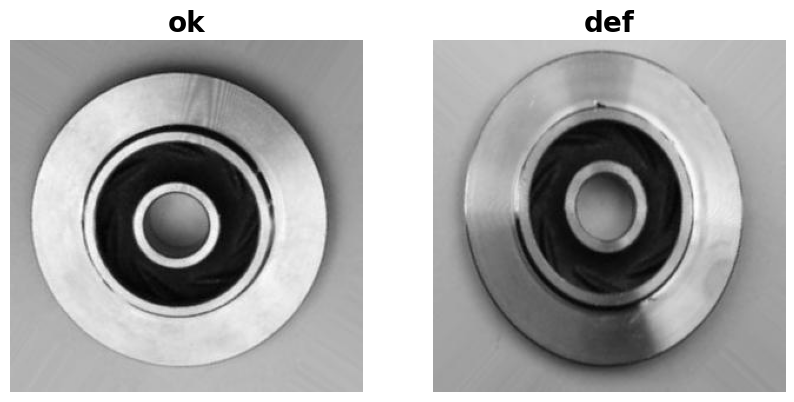

In [16]:
plt.figure(figsize=(10,8))
ok = plt.imread(train_path + 'ok_front/cast_ok_0_1.jpeg')
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("ok", weight='bold', size=20)
plt.imshow(ok,cmap='gray')

ng = plt.imread(train_path + 'def_front/cast_def_0_1001.jpeg')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("def", weight='bold', size=20)
plt.imshow(ng,cmap='gray')

plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Препроцессинг</div>
В тренировочном датасете для классификации фотографий, нам нужны некоторые технологии <b>[Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)</b>  для более надёжной модели.

## Что такое аугментация данных?
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>При обучении на изображениях без аугментации данных мы просто используем имеющиеся данные для создания мини-батчей. При применении аугментации после загрузки данных к изображениям применяются различные техники преобразований, чтобы создать новые вариации данных для обучения.<br/>
    Основные параметры техник аугментации (в Keras <a href='https://keras.io/ja/preprocessing/image/'>ImageDataGenerator</a>) включают:</p>
    <ul>
        <li><b>rotation_range</b> : Вращение изображения (напр. 50° → случайный поворот в диапазоне -50°~50°)</li>
        <li><b>zoom_range</b> : Масштабирование изображения (напр. 0.5 → случайное увеличение/уменьшение в диапазоне 0.5-1.5x)</li>
        <li><b>brightness_range</b> : Изменение яркости (напр. [0.3,1.0] → случайная корректировка яркости в заданном диапазоне)</li>
        <li><b>vertical_flip</b> : Отразить изображение по вертикали</li>
        <li><b>horizontal_flip</b> : Отразить изображение по горизонтали</li>
        <li><b>height_shift_range</b> : Сдвиг изображения вверх/вниз (напр. 0.3 → сдвиг на ±30% от высоты изображения)</li>
        <li><b>width_shift_range</b> : Сдвиг изображения влево/вправо (напр. 0.3 → сдвиг на ±30% от ширины изображения)</li>
        <li><b>rescale</b> : Нормализация значений пикселей (напр. 1/255 → приведение RGB-значений к диапазону 0.0-1.0)</li>
    </ul>
</div>

<!-- ## Что такое аугментация данных?
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>When training with image data without data augmentation, we simply need the specified number of data and create a mini-batch. When executing data augmentation, after acquiring the data, various augmentation techniques are applied to the image to create a new mini-batch. <br/>
    The main parameters of data augmentation techniques(Keras <a href='https://keras.io/ja/preprocessing/image/'>ImageDataGenerator</a>) are as follows : </p>
    <ul>
        <li><b>rotation_range</b> : Rotate the image (ex. 50 -> rotate randomly in -50°~50°)</li>
        <li><b>zoom_range</b> : Zoom in/out on the image (ex. 0.5 -> zoom in/out randomly in 1-0.5~1+0.5)</li>
        <li><b>brightness_range</b> : Change the brightness (ex. [0.3,1.0] -> change randomly in [0.3,1.0])</li>
        <li><b>vertical_flip</b> : Flip the image upside down</li>
        <li><b>horizontal_flip</b> : Flip the image left or right</li>
        <li><b>height_shift_range</b> : Move the image up or down in parallel (ex. 0.3 -> move up/down randomly in [-0.3*Height, 0.3*Height])</li>
        <li><b>width_shift_range</b> : Move the image left or right in parallel (ex. 0.3 -> move left/right randomly in [-0.3*Width, 0.3*Width])</li>
        <li><b>rescale</b> : The image is normalized by multiplying each pixel value by a constant. (ex. 1/255 -> normalize the RGB value of each pixel between 0.0 and 1.0)</li>
    </ul>
</div> -->

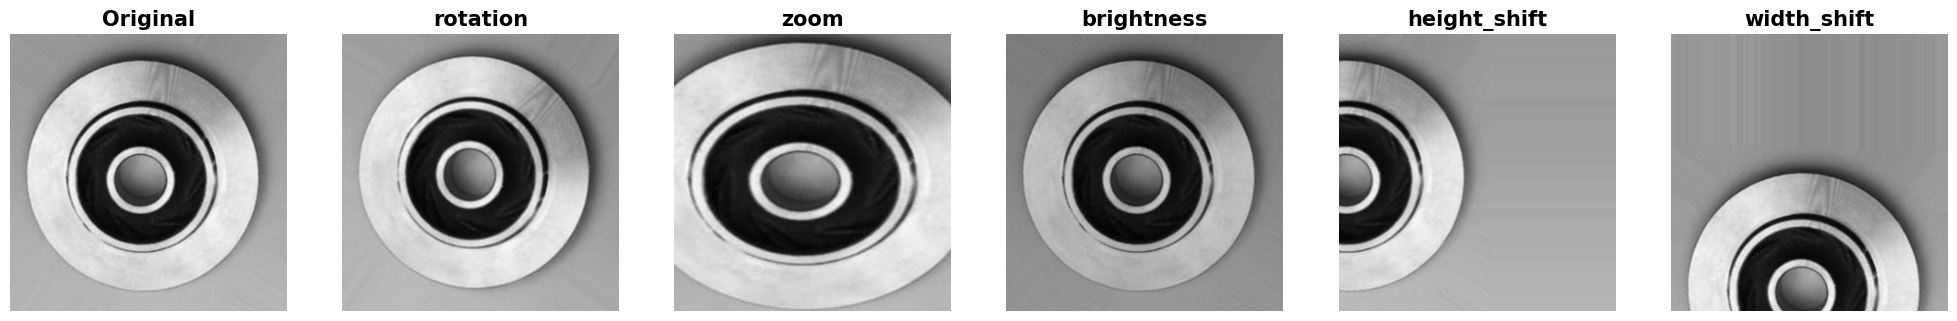

In [17]:
img = cv2.imread(train_path + 'ok_front/cast_ok_0_1.jpeg')
img_4d = img[np.newaxis]
plt.figure(figsize=(25,10))
generators = {"rotation":ImageDataGenerator(rotation_range=180),
              "zoom":ImageDataGenerator(zoom_range=0.7),
              "brightness":ImageDataGenerator(brightness_range=[0.2,1.0]),
              "height_shift":ImageDataGenerator(height_shift_range=0.7),
              "width_shift":ImageDataGenerator(width_shift_range=0.7)}

plt.subplot(1, 6, 1)
plt.title("Original", weight='bold', size=15)
plt.imshow(img)
plt.axis('off')
cnt = 2
for param, generator in generators.items():
    image_gen = generator
    gen = image_gen.flow(img_4d, batch_size=1)
    batches = next(gen)
    g_img = batches[0].astype(np.uint8)
    plt.subplot(1, 6, cnt)
    plt.title(param, weight='bold', size=15)
    plt.imshow(g_img)
    plt.axis('off')
    cnt += 1
plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Выполнение аугментации данных
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>В Keras вы можете передать класс <a href='https://keras.io/ja/preprocessing/image/'>ImageDataGenerator</a> в качестве набора данных при обучении модели, и он будет создавать мини-батчи, случайным образом применяя заданные параметры преобразований. На практике, если установить слишком высокие/низкие значения параметров, <u>изображения будут сильно искажаться, что затруднит процесс обучения.</u> Кроме того, для успешного обучения обычно требуется тонкая настройка параметров в зависимости от конкретных данных и целей анализа.<br/>
    В этой работе мы выполним аугментацию данных с умеренными преобразованиями, следуя рекомендациям из других исследований.</p>
</div>

In [18]:
image_gen = ImageDataGenerator(rescale=1/255,
                               zoom_range=0.1,
                               brightness_range=[0.9,1.0])

In [19]:
image_shape = (300,300,1) # 300 × 300、graysclaed (full-color : 3)
batch_size = 32

train_set = image_gen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode="grayscale",
                                            classes={'def_front': 0, 'ok_front': 1},
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            shuffle=True,
                                            seed=0)

test_set = image_gen.flow_from_directory(test_path,
                                           target_size=image_shape[:2],
                                           color_mode="grayscale",
                                           classes={'def_front': 0, 'ok_front': 1},
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           shuffle=False,
                                           seed=0)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [20]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

* class 0 : defect
* class 1 : ok

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Создание модели</div>
Так как цель данного ноутбука в том, чтобы научиться базовым технологиям анализа фотографий, мы будем использовать простую модель с технологией CNN, но не пытаясь достичь максимальной точности данной модели.

<!-- ## Model Settings
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>The elements of the model are listed below.（<a href="https://www.kaggle.com/ginsaputra/visual-inspection-of-casting-products-using-cnn">Referenced Notebook</a>）</p>
    <ul>
        <li><b>Sequential</b> : model container（<a href="https://keras.io/ja/getting-started/sequential-model-guide/">Official Manual</a>）</li>
        <li><b>Conv2D</b> : convolutional layer for 2D images（<a href="https://keras.io/ja/layers/convolutional/#conv2d">Official Manual</a>）
            <ul>
                <li><b>filters</b> : number of filters
                    <ul>
                        <li>numbers such as <u>16, 32, 64, 128, 256 and 512</u> tend to be used, and there is a technique to increase the number of filter for the complicated task and decrease it for simple one.</li>
                    </ul>
                </li>
                <li><b>kernel_size</b> : filter size (width * height)
                    <ul>
                        <li>combinations of odd numbers such as <u>3x3, 5x5, 7x7</u> tend to be used.</li>
                    </ul>
                </li>
                <li><b>strides</b> : window size used for convolution</li>
                <li><b>input_shape</b> : size of input images (width/height, color channel)
                    <ul>
                        <li>if you input color images as it is, the model will need convolutions for 3 RGB channels, which will increase the amount of calculation(graysclaed images need less calculations).</li>
                    </ul>
                </li>
                <li><b>activation</b> : activation function</li>
                <li><b>padding</b> : adjust the size of the layer output. When set to 'same', the pixels are filled with 0 so that the input and output sizes are the same.</li>
            </ul>
        </li>
        <li><b>MaxPooling2D</b> : pooling layer for 2D images（<a href="https://keras.io/ja/layers/pooling/#maxpooling2d">Official Manual</a>）
            <ul>
                <li><b>pool_size</b> : specify width/height range and extract the largest pixel in this range to downscale the input</li>
                <li><b>strides</b> : window size used for pooling</li>
            </ul>
        </li>
        <li><b>Flatten</b> : convert input to linear vector（<a href="https://keras.io/ja/layers/core/#flatten">Official Manual</a>）</li>
        <li><b>Dropout</b> : apply dropout and randomly set the input to the unit to 0 to prevent overfitting when updating weights（<a href="https://keras.io/ja/layers/core/#dropout">Official Manual</a>）
            <ul>
                <li><b>rate</b> : ratio of dropping the input to the unit</li>
            </ul>
        </li>
        <li><b>Dense</b> : fully connected layer（<a href="https://keras.io/ja/layers/core/#dense">Official Manual</a>）
            <ul>
                <li><b>units</b> : number of dimensions of output</li>
                <li><b>activation</b> : activation function（binary classification : <u>sigmoid</u>, other objectives : <u>softmax</u>） </li>
            </ul>
        </li>
    </ul>
</div> -->

## Настройки модели
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>Элементы модели перечислены ниже (основано на <a href="https://www.kaggle.com/ginsaputra/visual-inspection-of-casting-products-using-cnn">этом исследовании</a>)</p>
    <ul>
        <li><b>Sequential</b> : контейнер модели (<a href="https://keras.io/ja/getting-started/sequential-model-guide/">Официальная документация</a>)</li>
        <li><b>Conv2D</b> : сверточный слой для 2D-изображений (<a href="https://keras.io/ja/layers/convolutional/#conv2d">Официальная документация</a>)
            <ul>
                <li><b>filters</b> : количество фильтров
                    <ul>
                        <li>обычно используют значения типа <u>16, 32, 64, 128, 256 и 512</u>, при этом для сложных задач количество фильтров увеличивают, а для простых - уменьшают.</li>
                    </ul>
                </li>
                <li><b>kernel_size</b> : размер фильтра (ширина × высота)
                    <ul>
                        <li>обычно используют нечетные комбинации: <u>3×3, 5×5, 7×7</u>.</li>
                    </ul>
                </li>
                <li><b>strides</b> : размер окна для свертки</li>
                <li><b>input_shape</b> : размер входных изображений (ширина/высота, цветовые каналы)
                    <ul>
                        <li>при использовании цветных изображений модель будет обрабатывать 3 RGB-канала, что увеличит объем вычислений (для черно-белых изображений вычислений требуется меньше).</li>
                    </ul>
                </li>
                <li><b>activation</b> : функция активации</li>
                <li><b>padding</b> : регулировка размера выхода слоя. При значении 'same' пиксели заполняются нулями для сохранения размеров входа и выхода.</li>
            </ul>
        </li>
        <li><b>MaxPooling2D</b> : слой субдискретизации для 2D-изображений (<a href="https://keras.io/ja/layers/pooling/#maxpooling2d">Официальная документация</a>)
            <ul>
                <li><b>pool_size</b> : определяет область для выбора максимального значения пикселя, уменьшая размерность данных</li>
                <li><b>strides</b> : размер окна для операции пулинга</li>
            </ul>
        </li>
        <li><b>Flatten</b> : преобразует входные данные в линейный вектор (<a href="https://keras.io/ja/layers/core/#flatten">Официальная документация</a>)</li>
        <li><b>Dropout</b> : метод регуляризации, случайно обнуляющий часть входных данных для предотвращения переобучения (<a href="https://keras.io/ja/layers/core/#dropout">Официальная документация</a>)
            <ul>
                <li><b>rate</b> : вероятность обнуления входного элемента</li>
            </ul>
        </li>
        <li><b>Dense</b> : полносвязный слой (<a href="https://keras.io/ja/layers/core/#dense">Официальная документация</a>)
            <ul>
                <li><b>units</b> : размерность выходного пространства</li>
                <li><b>activation</b> : функция активации (для бинарной классификации: <u>sigmoid</u>, для других задач: <u>softmax</u>)</li>
            </ul>
        </li>
    </ul>
</div>

In [21]:
backend.clear_session()
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(7,7), strides=2, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=224, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │     4,645,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,669,249 (17.81 MB)

 Trainable params: 4,669,249 (17.81 MB)

 Non-trainable params: 0 (0.00 B)

Ниже представленна архитектура модели

In [22]:
plot_model(model, show_shapes=True, expand_nested=True, dpi=60)

You must install pydot (`pip install pydot`) for `plot_model` to work.


<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

### Построение модели
<div class="alert alert-success" role="alert" style="border-radius:10px"> Конфигурация обучения: <ul> <li><b>EarlyStopping</b> : Условия досрочной остановки обучения (<a href='https://keras.io/ja/callbacks/#earlystopping'>Официальная документация</a>) <ul> <li>Пример: если loss на валидации не улучшается в течение 2 эпох</li> </ul> </li> <li><b>ModelCheckpoint</b> : Настройки сохранения модели после каждой эпохи (<a href='https://keras.io/ja/callbacks/#modelcheckpoint'>Официальная документация</a>) <ul> <li>Позволяет сохранять лучшие веса модели в процессе обучения</li> </ul> </li> </ul> </div>

In [23]:
model_save_path = 'casting_product_det_Версия2.hdf5'
early_stop = EarlyStopping(monitor='val_loss',patience=2)
checkpoint = ModelCheckpoint(filepath=model_save_path+'.keras', verbose=1, save_best_only=True, monitor='val_loss')

In [24]:
n_epochs = 3
results = model.fit(train_set, epochs=n_epochs, validation_data=test_set, callbacks=[early_stop,checkpoint])

Epoch 1/3
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.6248 - loss: 0.6472
Epoch 1: val_loss improved from inf to 0.32635, saving model to casting_product_det_Версия2.hdf5.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 85s 399ms/step - accuracy: 0.6252 - loss: 0.6468 - val_accuracy: 0.8867 - val_loss: 0.3263
Epoch 2/3
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.8721 - loss: 0.2913
Epoch 2: val_loss improved from 0.32635 to 0.13194, saving model to casting_product_det_Версия2.hdf5.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 87s 418ms/step - accuracy: 0.8722 - loss: 0.2910 - val_accuracy: 0.9538 - val_loss: 0.1319
Epoch 3/3
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.9519 - loss: 0.1412
Epoch 3: val_loss did not improve from 0.13194
208/208 ━━━━━━━━━━━━━━━━━━━━ 83s 398ms/step - accuracy: 0.9518 - loss: 0.1412 - val_accuracy: 0.9189 - val_loss: 0.1729


In [25]:
model_history = { i:list(map(lambda x: float(x), j)) for i,j in results.history.items() }
with open('model_history.json', 'w') as f:
    json.dump(model_history, f, indent=4)

Reusing a trained model and training history

In [26]:
#model = load_model("/kaggle/input/casting-product-detectionhdf5/casting_product_detection.hdf5")
#model_history = json.load(open('/kaggle/input/model-historyjson/model_history.json', 'r'))

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Перформанс модели

In [27]:
losses = pd.DataFrame(model_history)
losses.index = map(lambda x : x+1, losses.index)
losses.head(10)

,accuracy,loss,val_accuracy,val_loss
1,0.693804,0.561899,0.886713,0.326346
2,0.897482,0.245555,0.953846,0.131943
3,0.948892,0.143672,0.918881,0.172914


Поскольку значения потерь (loss) как при обучении, так и при валидации стабильно уменьшаются с каждой эпохой, а точность (accuracy) как при обучении, так и при валидации стабильно растёт, можно сказать, что обучение модели в целом прошло успешно.

In [40]:
g = hv.Curve(losses.loss, label='Training Loss') * hv.Curve(losses.val_loss, label='Validation Loss') \
    * hv.Curve(losses.accuracy, label='Training Accuracy') * hv.Curve(losses.val_accuracy, label='Validation Accuracy')
g.opts(opts.Curve(xlabel="Epochs", ylabel="Loss / Accuracy", width=700, height=400,tools=['hover'],show_grid=True,title='Эвалюция модели')).opts(legend_position='bottom')

:Overlay
   .Curve.Training_Loss       :Curve   [index]   (loss)
   .Curve.Validation_Loss     :Curve   [index]   (val_loss)
   .Curve.Training_Accuracy   :Curve   [index]   (accuracy)
   .Curve.Validation_Accuracy :Curve   [index]   (val_accuracy)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>Оценка модели на тестовом наборе данных.<br>
       Согласно матрице ошибок, из 715 изображений 1 было ошибочно классифицировано как дефектное (Ложноположительный результат), а 2 были ошибочно классифицированы как нормальные (Ложноотрицательный результат).<br>
       В задачах промышленного контроля изображений ошибочная классификация может привести к следующим последствиям:</p>
    <ul>
        <li><b>Ложноотрицательный результат</b> : Это случай <u>"пропуска дефекта"</u>, когда модель не может определить дефектные изображения как 'дефектные'. Это может негативно повлиять на последующие производственные процессы или привести к выпуску бракованной продукции.</li>
        <li><b>Ложноположительный результат</b> : Это случай <u>"ложной тревоги"</u>, когда модель ошибочно классифицирует нормальные изображения как 'дефектные'. Это может привести к неоправданным простоям производственной линии или дополнительным затратам на перепроизводство.</li>
    </ul>
    <p>Выбор между важностью Ложноположительных и Ложноотрицательных результатов (зависящий от бизнес-требований) определяет, какой показатель - <b>Точность (Precision)</b> или <b>Полнота (Recall)</b> - следует использовать для оценки модели. Если важно учитывать оба показателя, выбирайте <b>F1-меру</b> - гармоническое среднее между Точностью и Полнотой.</p>
</div>

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step


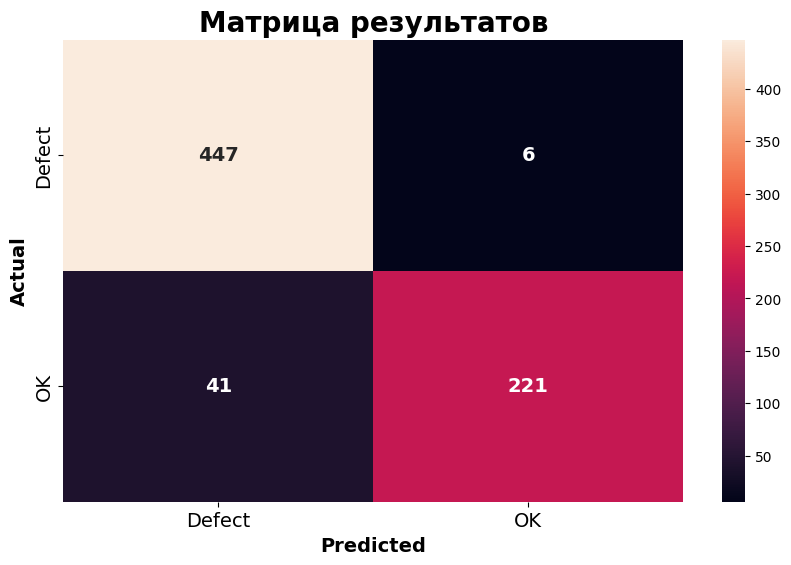

In [41]:
pred_probability = model.predict(test_set)
predictions = pred_probability > 0.5

plt.figure(figsize=(10,6))
plt.title("Матрица результатов", size=20, weight='bold')
sns.heatmap(
    confusion_matrix(test_set.classes, predictions),
    annot=True,
    annot_kws={'size':14, 'weight':'bold'},
    fmt='d',
    xticklabels=['Defect', 'OK'],
    yticklabels=['Defect', 'OK'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [30]:
print(classification_report(test_set.classes, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.900     0.989     0.942       453
           1      0.977     0.809     0.885       262

    accuracy                          0.923       715
   macro avg      0.938     0.899     0.914       715
weighted avg      0.928     0.923     0.921       715



<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Предсказание случайной фотки

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


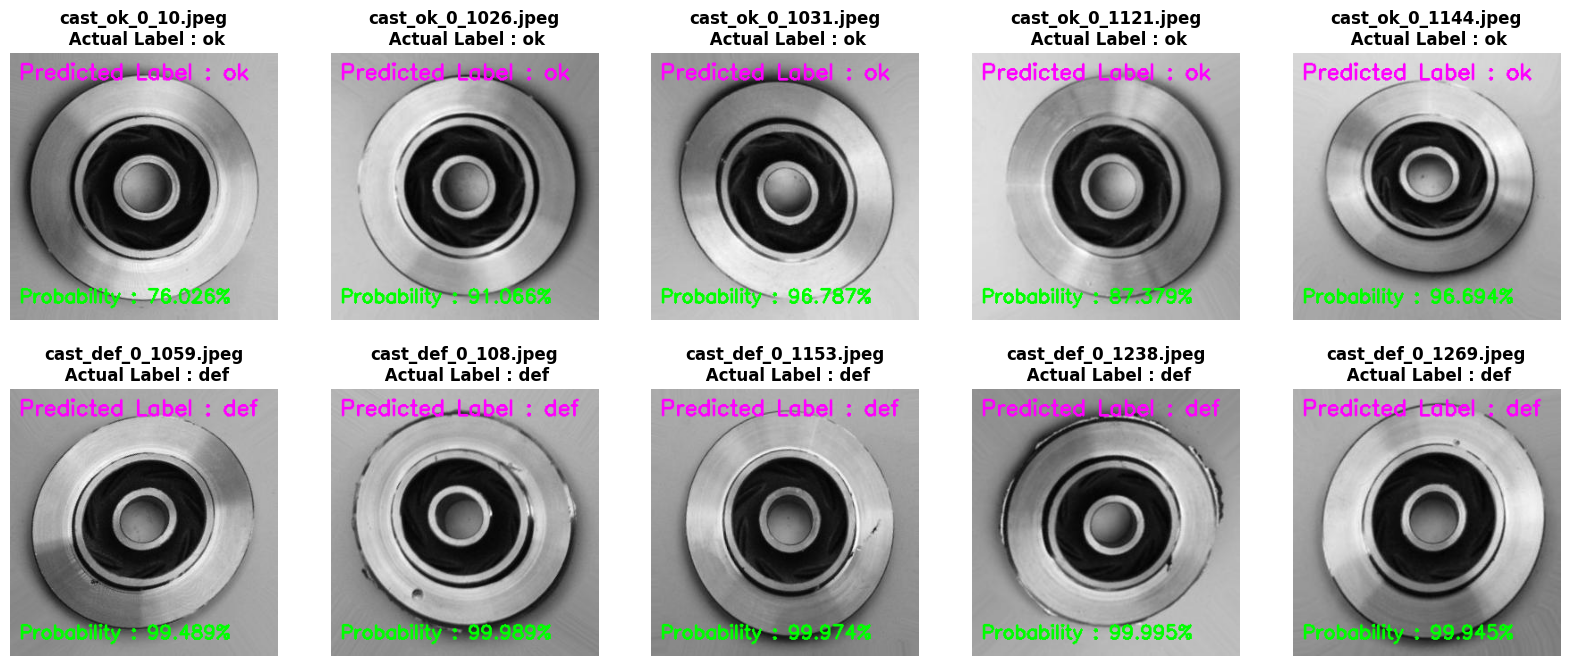

In [44]:
test_cases = ['ok_front/cast_ok_0_10.jpeg', 'ok_front/cast_ok_0_1026.jpeg', 'ok_front/cast_ok_0_1031.jpeg', 'ok_front/cast_ok_0_1121.jpeg', \
              'ok_front/cast_ok_0_1144.jpeg','def_front/cast_def_0_1059.jpeg', 'def_front/cast_def_0_108.jpeg', 'def_front/cast_def_0_1153.jpeg',\
              'def_front/cast_def_0_1238.jpeg', 'def_front/cast_def_0_1269.jpeg']

plt.figure(figsize=(20,8))
for i in range(len(test_cases)):
    img_pred = cv2.imread(test_path + test_cases[i], cv2.IMREAD_GRAYSCALE)
    img_pred = img_pred / 255 # rescale
    prediction = model.predict(img_pred.reshape(1, *image_shape))

    img = cv2.imread(test_path + test_cases[i])
    label = test_cases[i].split("_")[0]

    plt.subplot(2, 5, i+1)
    plt.title(f"{test_cases[i].split('/')[1]}\n Actual Label : {label}", weight='bold', size=12)
    # Predicted Class : defect
    if (prediction < 0.5):
        predicted_label = "def"
        prob = (1-prediction.sum()) * 100
    # Predicted Class : OK
    else:
        predicted_label = "ok"
        prob = prediction.sum() * 100

    cv2.putText(img=img, text=f"Predicted Label : {predicted_label}", org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(255, 0, 255), thickness=2)
    cv2.putText(img=img, text=f"Probability : {'{:.3f}'.format(prob)}%", org=(10, 280), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(0, 255, 0), thickness=2)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

plt.show()

In [32]:
inner_casting_data
print(os.listdir(inner_casting_data+'/test/ok_front'))

['cast_ok_0_10.jpeg', 'cast_ok_0_1001.jpeg', 'cast_ok_0_1002.jpeg', 'cast_ok_0_1003.jpeg', 'cast_ok_0_1019.jpeg', 'cast_ok_0_1020.jpeg', 'cast_ok_0_1021.jpeg', 'cast_ok_0_1022.jpeg', 'cast_ok_0_1026.jpeg', 'cast_ok_0_1028.jpeg', 'cast_ok_0_1031.jpeg', 'cast_ok_0_1040.jpeg', 'cast_ok_0_1066.jpeg', 'cast_ok_0_1069.jpeg', 'cast_ok_0_1077.jpeg', 'cast_ok_0_1088.jpeg', 'cast_ok_0_1092.jpeg', 'cast_ok_0_1093.jpeg', 'cast_ok_0_1095.jpeg', 'cast_ok_0_1096.jpeg', 'cast_ok_0_1120.jpeg', 'cast_ok_0_1121.jpeg', 'cast_ok_0_1127.jpeg', 'cast_ok_0_1132.jpeg', 'cast_ok_0_1134.jpeg', 'cast_ok_0_1137.jpeg', 'cast_ok_0_1140.jpeg', 'cast_ok_0_1141.jpeg', 'cast_ok_0_1144.jpeg', 'cast_ok_0_1145.jpeg', 'cast_ok_0_1160.jpeg', 'cast_ok_0_1165.jpeg', 'cast_ok_0_1169.jpeg', 'cast_ok_0_1170.jpeg', 'cast_ok_0_1171.jpeg', 'cast_ok_0_1172.jpeg', 'cast_ok_0_1173.jpeg', 'cast_ok_0_1174.jpeg', 'cast_ok_0_1176.jpeg', 'cast_ok_0_1180.jpeg', 'cast_ok_0_1200.jpeg', 'cast_ok_0_1202.jpeg', 'cast_ok_0_1203.jpeg', 'cast_ok_0_1

## Ошибки в классификации
Давайте посмотрим на ошибочную классификацию тестового набора. Машинное зрение тут выиграла зрение человека.

In [45]:
test_cases = [i for i in os.listdir(inner_casting_data+'/test/ok_front')]
test_cases.extend([i for i in os.listdir(inner_casting_data+'/test/def_front')])

plt.figure(figsize=(20,8))
cnt = 0
misclassified = []
for i in range(len(test_cases)):
    if cnt == 10:break # show max 10 images
    img_pred = cv2.imread(test_path + test_cases[i], cv2.IMREAD_GRAYSCALE)
    try:
        img_pred = img_pred / 255 # rescale
    except:
        continue
    prediction = model.predict(img_pred.reshape(1, *image_shape))

    img = cv2.imread(test_path + test_cases[i])
    label = test_cases[i].split("_")[0]

    # Predicted Class : defect
    if (prediction < 0.5):
        predicted_label = "def"
        prob = (1-prediction.sum()) * 100
    # Predicted Class : OK
    else:
        predicted_label = "ok"
        prob = prediction.sum() * 100

    # select mismatched case
    if label != predicted_label:
        misclassified.append(test_cases[i])
        plt.subplot(2, 5, cnt+1)
        plt.title(f"{test_cases[i].split('/')[1]}\n Actual Label : {label}", weight='bold', size=12)
        cv2.putText(img=img, text=f"Predicted Label : {predicted_label}", org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(255, 0, 255), thickness=2)
        cv2.putText(img=img, text=f"Probability : {'{:.3f}'.format(prob)}%", org=(10, 280), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(0, 255, 0), thickness=2)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        cnt += 1
    else:
        continue

plt.show()

<Figure size 2000x800 with 0 Axes>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Интерпретация модели
<div class="alert alert-success" role="alert" style="border-radius:10px">
Проведем интерпретацию модели с помощью <a href='https://github.com/slundberg/shap'>SHAP</a>. Возьмем несколько изображений, классифицированных как <b>дефектные</b>, чтобы понять, какие области изображения модель считает наиболее значимыми.<br>
Анализируя <b>синие области</b> на результатах SHAP, можно сделать вывод, что модель идентифицирует <u>царапины, отверстия на поверхности изделий и неровности по краям</u> как характерные признаки дефектов.
</div>

In [34]:
os.listdir(inner_casting_data)

['test', 'train']

In [35]:
train_cases = ['ok_front/'+i for i in os.listdir(inner_casting_data+'/train/ok_front')]
train_cases.extend(['def_front/'+i for i in os.listdir(inner_casting_data+'/train/def_front')])
train_sample = [cv2.imread(train_path + i, cv2.IMREAD_GRAYSCALE).reshape(1, *image_shape) / 255 for i in np.random.choice(train_cases, 3000, replace=False)]
explainer = shap.DeepExplainer(model, train_sample[0])

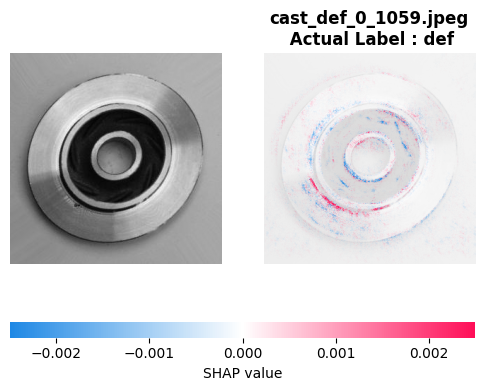

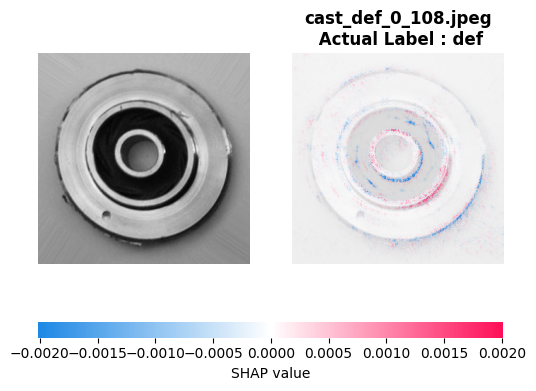

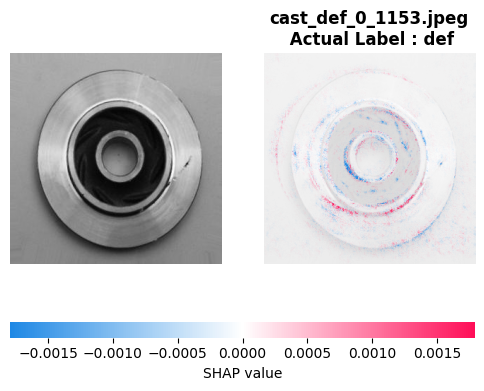

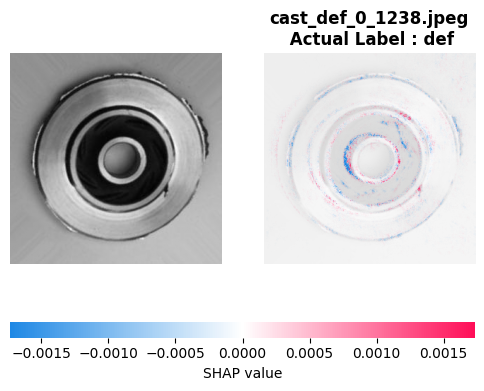

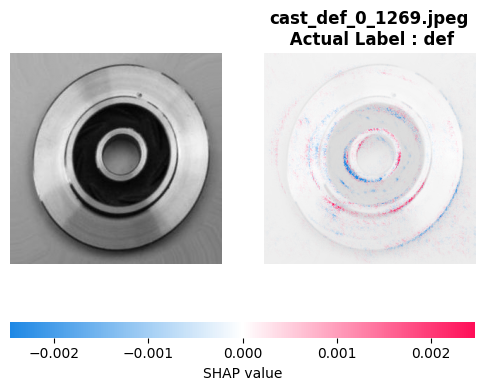

In [36]:
test_cases = ['def_front/cast_def_0_1059.jpeg', 'def_front/cast_def_0_108.jpeg', 'def_front/cast_def_0_1153.jpeg',\
              'def_front/cast_def_0_1238.jpeg', 'def_front/cast_def_0_1269.jpeg']

for i in test_cases:
    img = cv2.imread(test_path + i, cv2.IMREAD_GRAYSCALE).reshape(1, *image_shape) / 255
    shap_values = explainer.shap_values(img)
    shap.image_plot(shap_values, img, show=False)
    plt.title(f"{i.split('/')[1]}\n Actual Label : {i.split('_')[0]}", weight='bold', size=12)
    plt.axis('off')
plt.show()

## Почему есть вероятность ошибочной классификации
Использую SHAP попытаемся сделать вывод. Считается, что <u> тени, царапины, и дыры остаются без внимания</u> и счтаются <b>нормальными</b>.

In [37]:
for i in misclassified:
    img = cv2.imread(test_path + i, cv2.IMREAD_GRAYSCALE).reshape(1, *image_shape) / 255
    shap_values = explainer.shap_values(img)
    shap.image_plot(shap_values, img, show=False)
    plt.title(f"{i.split('/')[1]}\n Actual Label : {i.split('_')[0]}", weight='bold', size=12)
    plt.axis('off')
plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Заключение</div>
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <ul>
        <li>Процесс <b>аугментации данных</b> может быть легко интегрирован в процесс обучения с использованием ImageDataGenerator.</li>
        <li>При аугментации данных следует избегать чрезмерных преобразований и может потребоваться тонкая настройка в зависимости от набора данных.</li>
        <li>Согласно результатам интерпретации модели, было установлено, что <b>царапины/отверстия на поверхности изделий и неровности по краям</b> распознаются как значимые признаки дефектов.</li>
        <li>Успешное создание модели с относительно высокой точностью позволяет интегрировать ее в систему камер контрольно-измерительной линии для автоматизации проверки.
            <ul>
                <li>Однако, учитывая последствия пропуска дефектов, полная автоматизация пока невозможна (существуют также сложности с получением изображений, такие как освещение). Рекомендуется использовать модель как инструмент поддержки операторов контроля или способ сокращения трудозатрат.</li>
                <li>Также рассматривается возможность улучшения модели и системы обнаружения дефектов по принципу <b><a href="https://ieeexplore.ieee.org/document/9493179">Human-in-the-Loop</a></b> (человек в контуре управления).</li>
            </ul>
        </li>
    </ul>
</div>



<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Источники</div>
* Keras Official Manual  
    * https://keras.io/ja/  
* Image Data Pre-Processing Techniques
    * https://pynote.hatenablog.com/entry/keras-image-data-generator
* Keras ImageDataGenerator  
    * https://keras.io/ja/preprocessing/image/
* OpenCV puttext
    * http://opencv.jp/opencv-2svn/cpp/drawing_functions.html#cv-puttext  
* CNN Basic Explanation  
    * https://products.sint.co.jp/aisia/blog/vol1-16  
* CNN Implementations using Keras
    * https://qiita.com/kenichiro-yamato/items/60affeb7ca9f67c87a17  
    * https://child-programmer.com/ai/keras/conv2d/  
    * https://child-programmer.com/ai/keras/maxpooling2d/  
* SHAP Deep Explainer
    * https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html  
* SHAP Image Plot  
    * https://shap-lrjball.readthedocs.io/en/latest/generated/shap.image_plot.html  
* Referenced Notebooks  
    * CNN Implementation  
        * https://www.kaggle.com/ravirajsinh45/simple-model-for-casting-product-classification  
        * https://www.kaggle.com/ginsaputra/visual-inspection-of-casting-products-using-cnn  
        * https://www.kaggle.com/tomythoven/casting-inspection-with-data-augmentation-cnn  
    * Feature Map  
        * https://www.kaggle.com/vannak/magical-localized-fault-detection
* MISC
    * https://codepen.io/ikapper/pen/EqaVjP

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_defect(model, img_path, threshold=0.5):
    """
    Предсказывает наличие дефекта на новом изображении

    Параметры:
    model - обученная модель
    img_path - путь к изображению
    threshold - порог классификации (по умолчанию 0.5)

    Возвращает:
    prediction - 0 (дефект) или 1 (норма)
    probability - вероятность дефекта
    """
    # Загрузка и подготовка изображения
    img = image.load_img(img_path, target_size=(300, 300), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем размерность батча
    img_array /= 255.0  # Нормализация как при обучении

    # Предсказание
    probability = model.predict(img_array)[0][0]
    prediction = 1 if probability > threshold else 0

    return prediction, probability

In [39]:
# Путь к вашему изображению
new_image_path = "/content/тестируем модель/dont_baryyy.jpg"

# Получаем предсказание
pred, prob = predict_defect(model, new_image_path)

# Выводим результат
class_names = {0: "Дефект", 1: "Норма"}
print(f"Результат: {class_names[pred]}")
print(f"Вероятность: {prob:.4f}")

# Визуализация
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title(f"{class_names[pred]} (вероятность: {prob:.2f})")
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/тестируем модель/dont_baryyy.jpg'

In [ ]:
# /content/тестируем модель/плохие/9032895823902.jpg# Сохранение модели
model.save('херСосать.keras')  # или .h5

# Загрузка модели
from tensorflow.keras.models import load_model

# Использование загруженной модели
#pred, prob = predict_defect(loaded_model, "/content/тестируем модель/iznos_tormoznyh_diskov.jpg")